# OBJETIVO DA ANÁLISE

#### Canário fictício: 

Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.
Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises: 

1. Dados climáticos. 
2. Dados demográficos. 
3. Dados econômicos. 
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações: 

a. País de origem (Brasil). 
b. País de destino. 
c. Quantidade em litros de vinho exportado (utilize: 1KG =1L). 
d. Valor em US$.


Avaliar o cenário do Brasil em exportação de vinhos, para criação de relatórios para tomada de decisão de acionistas e investidores

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01 

#### Objetivo: 
Seu objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações.
Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



# IMPORTANDO BIBLIOTECAS

In [1546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

# CARREGANDO BASE

In [1547]:
expo_vinho = pd.read_csv('C:/Users/gesia/OneDrive/Desktop/Estudos/PosTech/Fase1/TechChallenge/Bases/ExpVinho.csv', sep='\t')


# ESTRUTURANDO BASE

#### EXPORTACAO DE VINHOS

In [1548]:
# 1KG = 1Litro

In [1549]:
#visualizando a tabela
expo_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1550]:
#excluindo a coluna 'ID'
expo_vinho.drop('Id', axis= 1, inplace= True)

#tornando a coluna 'Pais' o index
expo_vinho.set_index('País', inplace=True)

In [1551]:
#selecionando apenas os ultimos 15 anos (30 colunas, considerando que cada ano há 2)

expo_vinho = expo_vinho[expo_vinho.columns[-30:]]
expo_vinho.head()

,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
Angola,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,...,0,0,0,0,4068,4761,0,0,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1552]:
#criando uma coluna total para identificar paises que nao tem nenhuma exportação em L/US
expo_vinho['total'] = expo_vinho.sum(axis=1)

#visualizando tabela
expo_vinho.head()

,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,...,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,11,46,0,0,0,0,0,0,57
África do Sul,0,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,117,698,103,1783,2847
"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,...,32605,2698,6741,7630,45367,4806,31853,6666,48095,2232585
Angola,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,...,0,0,0,4068,4761,0,0,0,0,509232
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1553]:
#selecionando apenas os paises com nenhuma exportação para visualização
expo_vinho_vazio = expo_vinho.query('total == 0')

#visualizando tabela
expo_vinho_vazio.head()

,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,...,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,total
País,,,,,,,,,,,,,,,,,,,,,
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Costa Rica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Salvador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Eslovaca, Republica",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1554]:
#filtrando no df somente os paises com exportação
expo_vinho.query('total > 0', inplace=True)

#visualizando tabela
expo_vinho.head()

,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,...,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,11,46,0,0,0,0,0,0,57
África do Sul,0,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,117,698,103,1783,2847
"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,...,32605,2698,6741,7630,45367,4806,31853,6666,48095,2232585
Angola,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,...,0,0,0,4068,4761,0,0,0,0,509232
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,1864,805,2268,419,1866,383,1848,447,3329,15849


In [1555]:
#excluindo a coluna de total, criada para apoio
expo_vinho.drop('total', axis=1, inplace=True)

#visualizando tabela
expo_vinho.head()

,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
Angola,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,...,0,0,0,0,4068,4761,0,0,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,624,1864,805,2268,419,1866,383,1848,447,3329


In [1556]:
#função para separar o df pelas colunas KG (não contem ".") e US (contém ".")

def gera_tabelas_valor_e_kg(dados):

  #atribuindo a variavel uma com lista com nomes das colunas que contém "." no texto

  columnsUS = dados.columns[dados.columns.str.contains('.', regex=False)]

  # mesmo coisa acima, mais incluido o "~" que iverte a lista booleana, agora ele procura todos que NÃO contém "."
  columnsKG = dados.columns[~dados.columns.str.contains('.', regex=False)]

  #atribuindo ao dataframe apenas as colunas de US selecionadas com a lista acima
  dadosUS = dados[columnsUS]
  
  #padronizando o nome da coluna de US da mesma forma que a de KG, para que seja retirado o ".1" dos anos
  dadosUS.columns = columnsKG

  #atribuindo ao dataframe apenas as colunas de KG selecionadas com a lista acima
  dadosKG = dados[columnsKG]

  #ele vai retornar os dataframes criados de forma apartada
  return dadosUS, dadosKG

# No regex, o "." não significa apenas um ponto literal. Ele é um símbolo especial que representa qualquer caractere.
# o regex = False desativa isso, e ele procura o ponto de forma literal no texto

In [1557]:
#gerando os dataframes com a função
expo_vinhoUS, expo_vinhoKG = gera_tabelas_valor_e_kg(expo_vinho)

In [1558]:
#visualizando a tabela
expo_vinhoUS.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0
África do Sul,0,0,0,0,0,0,0,0,0,95,21,0,0,698,1783
"Alemanha, República Democrática",138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
Angola,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866,1848,3329


In [1559]:
#visualizando a tabela
expo_vinhoKG.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0
África do Sul,0,0,0,0,0,0,0,0,0,26,4,0,0,117,103
"Alemanha, República Democrática",27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
Angola,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,37,219,624,805,419,383,447


# EXPLORANDO OS DADOS

### EXPORTACAO DE VINHOS

#### TENDENCIA DOS 15 ANOS

In [1560]:
# expo_vinhoUS
# expo_vinhoKG

In [1561]:
#Criando uma tabela de KG transposta, para facilitar a criação dos graficos
expo_vinhoKG_T = expo_vinhoKG.T

#criando uma coluna de total do ano (soma de todos paises)
expo_vinhoKG_T['total_KG'] = expo_vinhoKG_T.sum(axis = 1)

#visualizando tabela
expo_vinhoKG_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Aruba,...,Togo,Toquelau,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_KG
2010,0,0,27715,33557,0,9810,0,0,0,0,...,0,0,0,0,0,914,0,0,8820,1280574
2011,0,0,36070,13889,0,7335,0,0,13253,900,...,0,0,0,0,0,1238,0,0,0,1214834
2012,0,0,8189,2833,0,9247,0,0,0,0,...,0,0,531,0,0,1135,0,1029,0,5775376
2013,0,0,61699,1573,0,11281,0,0,0,0,...,0,0,0,0,0,1526,0,0,0,9149059
2014,0,0,213348,12182,0,4455,0,0,20385,450,...,0,0,360,0,0,0,0,14,0,2324029


In [1562]:
#Criando uma tabela de US transposta, para facilitar a criação dos graficos
expo_vinhoUS_T = expo_vinhoUS.T

#criando uma coluna de total do ano (soma de todos paises)
expo_vinhoUS_T['total_US'] = expo_vinhoUS_T.sum(axis = 1)

#visualizando tabela
expo_vinhoUS_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Aruba,...,Togo,Toquelau,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_US
2010,0,0,138666,189891,0,12808,0,0,0,0,...,0,0,0,0,0,2929,0,0,9977,2595303
2011,0,0,144150,69001,0,10188,0,0,55460,1680,...,0,0,0,0,0,4404,0,0,0,3615120
2012,0,0,56342,8861,0,14081,0,0,0,0,...,0,0,2720,0,0,3879,0,7492,0,5521293
2013,0,0,265978,9300,0,19565,0,0,0,0,...,0,0,0,0,0,13343,0,0,0,22744845
2014,0,0,761653,23124,0,7169,0,0,95130,755,...,0,0,1600,0,0,0,0,232,0,7472795


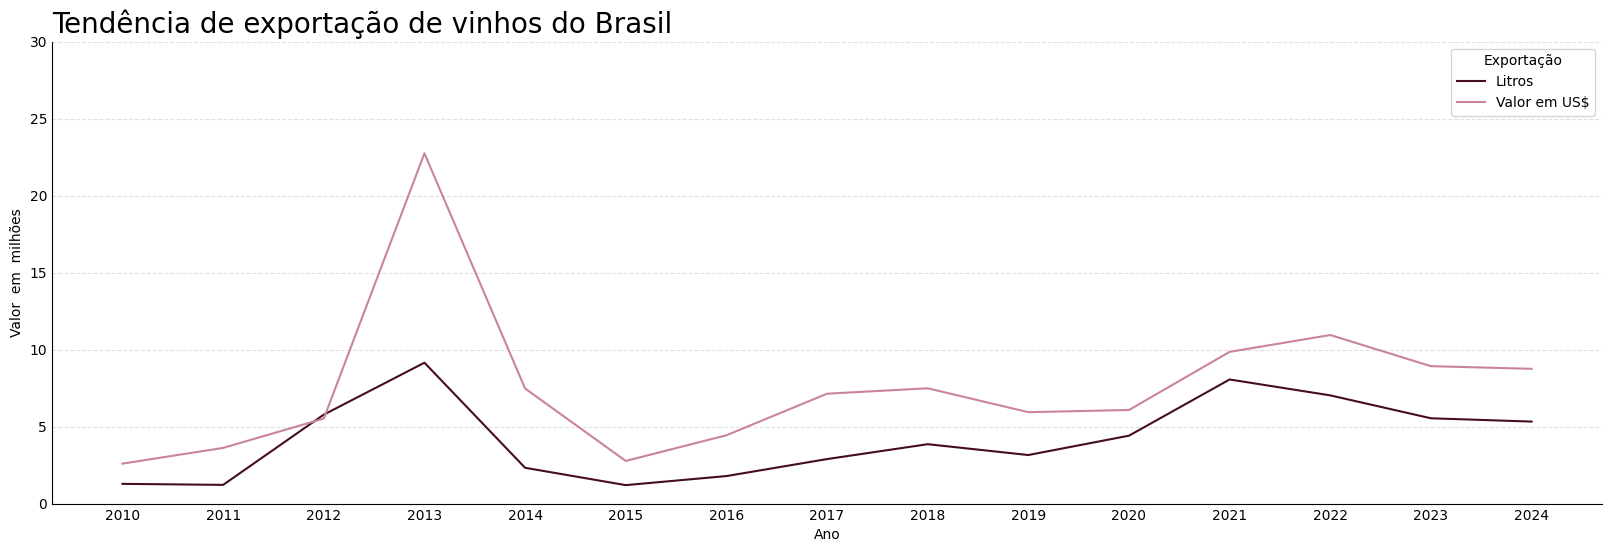

In [1563]:
#criando uma figura
fig, ax = plt.subplots(figsize=(20,6))

#definindo tipo de grafico e eixos + legenda
sns.lineplot(expo_vinhoKG_T, x = expo_vinhoKG_T.index, y = expo_vinhoKG_T['total_KG'] / 1_000_000, label= 'Litros', color = "#460C25")
sns.lineplot(expo_vinhoUS_T, x = expo_vinhoUS_T.index, y = expo_vinhoUS_T['total_US'] / 1_000_000, label= 'Valor em US$', color = "#c983a0")

#melhorando formatação do grafico
ax.set_title('Tendência de exportação de vinhos do Brasil', fontsize = 20, loc= 'left')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor  em  milhões')
ax.grid(color= '#e1e1e1', linestyle='--', axis = 'y' )
ax.legend(title = 'Exportação',loc='upper right')
ax.set_ylim(0, 30)
ax.spines['top'].set_visible(False) #retirando a linha de cima do retangulo da figura
ax.spines['right'].set_visible(False) #retirando a linha direita do retangulo da figura
ax.tick_params(axis='both', which='both', length=0) ## Removendo todos os ticks dos eixos X e Y

plt.show()

Avaliando o histórico de exportação de vinhos desde 2010, nota-se um pico discrepante em 2013. No entanto, esse crescimento não se manteve de forma linear nos anos seguintes, sugerindo a influência de fatores pontuais.

Segundo o Comunicado Técnico 157 da Embrapa, esse aumento nas exportações de vinhos foi impulsionado, em parte, por políticas do governo federal, como o programa de escoamento da produção e o programa de exportação Wines of Brazil. Além disso, a taxa cambial favorável contribuiu para tornar os produtos nacionais mais competitivos no mercado internacional.

Portanto, para esta análise, os dados considerados serão a partir de 2015, garantindo que o impacto desse evento não comprometa a conclusão final


fonte: https://www.infoteca.cnptia.embrapa.br/infoteca/bitstream/doc/992336/1/ComunicadoTecnico157.pdf

#### RECONSIDERANDO OS ANOS DE EXPORTAÇÃO DE VINHO

In [1564]:
# expo_vinho = expo_vinho[expo_vinho.columns[-20:]]
# expo_vinho.head()

In [1565]:
# expo_vinhoUS, expo_vinhoKG = gera_tabelas_valor_e_kg(expo_vinho)

In [1566]:
#Sobreponto a tabela original de KG, selecionando apenas as ultimas 10 coluna (a partir de 2015)

expo_vinhoKG = expo_vinhoKG[expo_vinhoKG.columns[-10:]]

#visualizando tabela
expo_vinhoKG.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,11,0,0,0
África do Sul,0,0,0,0,26,4,0,0,117,103
"Alemanha, República Democrática",10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
Angola,1908,7359,10170,477,345,0,0,4068,0,0
Antígua e Barbuda,0,0,0,37,219,624,805,419,383,447


In [1567]:
#Sobreponto a tabela original de US, selecionando apenas as ultimas 10 coluna (a partir de 2015)
expo_vinhoUS = expo_vinhoUS[expo_vinhoUS.columns[-10:]]

#visualizando tabela
expo_vinhoUS.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,46,0,0,0
África do Sul,0,0,0,0,95,21,0,0,698,1783
"Alemanha, República Democrática",44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
Angola,17089,35390,61680,709,1065,0,0,4761,0,0
Antígua e Barbuda,0,0,0,191,1549,1864,2268,1866,1848,3329


In [1568]:
#criando uma coluna total para identificar paises que nao tem nenhuma exportação em L/US
expo_vinhoKG['total'] = expo_vinhoKG.sum(axis=1)
expo_vinhoUS['total'] = expo_vinhoUS.sum(axis=1)

#visualizando tabela
expo_vinhoUS.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,total
País,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,46,0,0,0,46
África do Sul,0,0,0,0,95,21,0,0,698,1783,2597
"Alemanha, República Democrática",44780,68109,87702,45382,25467,32605,6741,45367,31853,48095,436101
Angola,17089,35390,61680,709,1065,0,0,4761,0,0,120694
Antígua e Barbuda,0,0,0,191,1549,1864,2268,1866,1848,3329,12915


In [1569]:
#selecionando apenas os paises com nenhuma exportação para visualização
expo_vinhoKG_vazio = expo_vinhoKG.query('total == 0')
expo_vinhoUS_vazio = expo_vinhoUS.query('total == 0')

#visualizando tabela
expo_vinhoUS_vazio.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,total
País,,,,,,,,,,,
Aruba,0,0,0,0,0,0,0,0,0,0,0


In [1570]:
#selecionando apenas os paises que possuem exportação
expo_vinhoKG.query('total > 0', inplace=True)
expo_vinhoUS.query('total > 0', inplace=True)

#visualizando tabela
expo_vinhoUS.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,total
País,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,46,0,0,0,46
África do Sul,0,0,0,0,95,21,0,0,698,1783,2597
"Alemanha, República Democrática",44780,68109,87702,45382,25467,32605,6741,45367,31853,48095,436101
Angola,17089,35390,61680,709,1065,0,0,4761,0,0,120694
Antígua e Barbuda,0,0,0,191,1549,1864,2268,1866,1848,3329,12915


In [1571]:
#excluindo a coluna de total
expo_vinhoKG.drop('total', axis=1, inplace=True)
expo_vinhoUS.drop('total', axis=1, inplace=True)

#visualizando tabela
expo_vinhoUS.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,46,0,0,0
África do Sul,0,0,0,0,95,21,0,0,698,1783
"Alemanha, República Democrática",44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
Angola,17089,35390,61680,709,1065,0,0,4761,0,0
Antígua e Barbuda,0,0,0,191,1549,1864,2268,1866,1848,3329


SALVANDO BASE PARA POWER BI

In [1572]:
#transpondo os df
# expo_vinhoUS = expo_vinhoUS.T
# expo_vinhoKG = expo_vinhoKG.T

#criando coluna tipo em cada df para diferencia-las quando consolidado
# expo_vinhoUS['Tipo'] = "valor_us"
# expo_vinhoKG['Tipo'] = "litros"

In [1573]:
#consolidando tabelas com a coluna tipo diferenciando
# expo_vinho_join = pd.concat([expo_vinhoKG, expo_vinhoUS])

#visualizando tabela
# expo_vinho_join.head()

In [1574]:
#salvar a planilha consolidada
# expo_vinho_join.to_excel('expo_vinho.xlsx')

RETOMANDO REVISÃO DA BASE

In [1575]:
#Criando uma tabela de KG transposta, para facilitar a criação dos graficos
expo_vinhoKG_T = expo_vinhoKG.T

#criando uma coluna de total do ano (soma de todos paises)
expo_vinhoKG_T['total_KG'] = expo_vinhoKG_T.sum(axis = 1)

#visualizando tabela
expo_vinhoKG_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Austrália,...,Togo,Toquelau,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_KG
2015,0,0,10680,1908,0,6660,0,0,0,7437,...,0,0,0,0,0,0,0,0,0,1198479
2016,0,0,14012,7359,0,16641,0,0,0,1954,...,0,0,0,0,0,0,0,0,0,1786549
2017,0,0,15467,10170,0,5400,0,0,0,1350,...,0,0,0,0,0,0,0,680,0,2889572
2018,0,0,10794,477,37,0,0,0,15711,2055,...,0,0,0,360,0,7711,0,71,0,3856162
2019,0,26,3660,345,219,0,0,0,0,1161,...,0,0,0,115,0,6180,0,0,20,3152873


In [1576]:
#Criando uma tabela de US transposta, para facilitar a criação dos graficos
expo_vinhoUS_T = expo_vinhoUS.T

#criando uma coluna de total do ano (soma de todos paises)
expo_vinhoUS_T['total_US'] = expo_vinhoUS_T.sum(axis = 1)

#visualizando tabela
expo_vinhoUS_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Austrália,...,Togo,Toquelau,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_US
2015,0,0,44780,17089,0,10545,0,0,0,48011,...,0,0,0,0,0,0,0,0,0,2769160
2016,0,0,68109,35390,0,26450,0,0,0,13799,...,0,0,0,0,0,0,0,0,0,4434704
2017,0,0,87702,61680,0,8550,0,0,0,7500,...,0,0,0,0,0,0,0,2646,0,7135607
2018,0,0,45382,709,191,0,0,0,59150,6902,...,0,0,0,150,0,29617,0,355,0,7486063
2019,0,95,25467,1065,1549,0,0,0,0,4682,...,0,0,0,209,0,18497,0,0,32,5934826


#### TENDENCIA DE 2015 A 2024

In [1577]:
#visualizando a quantidade de paises (qtd de colunas - retirando a ultima de Total)
expo_vinhoKG_T.shape[1]-1

124

In [1578]:
#visualização geral da quantidade de litros, valor e paises exportados.

# incluindo a qtd de pais em variavel
qtd_paises = expo_vinhoKG_T.shape[1]-1

#incluindo a qtd de litros em variavel (soma de total)
valor_total_KG = f"{expo_vinhoKG_T['total_KG'].sum():,}".replace(',', '.')

#incluindo a o valor em variavel (soma de total)
valor_total_US = f"{expo_vinhoUS_T['total_US'].sum():,}".replace(',', '.')

# o ":," é utilizado para incluir o separador de milhar no número - o replace é para substituir o padrão de virgula por ponto


#mostrando em forma de texto. 
print(f'Entre 2015 e 2024 foram exportados {valor_total_KG} vinhos para {qtd_paises} países, com um faturamento de {valor_total_US} dólares.')

Entre 2015 e 2024 foram exportados 43.241.392 vinhos para 124 países, com um faturamento de 72.310.223 dólares.


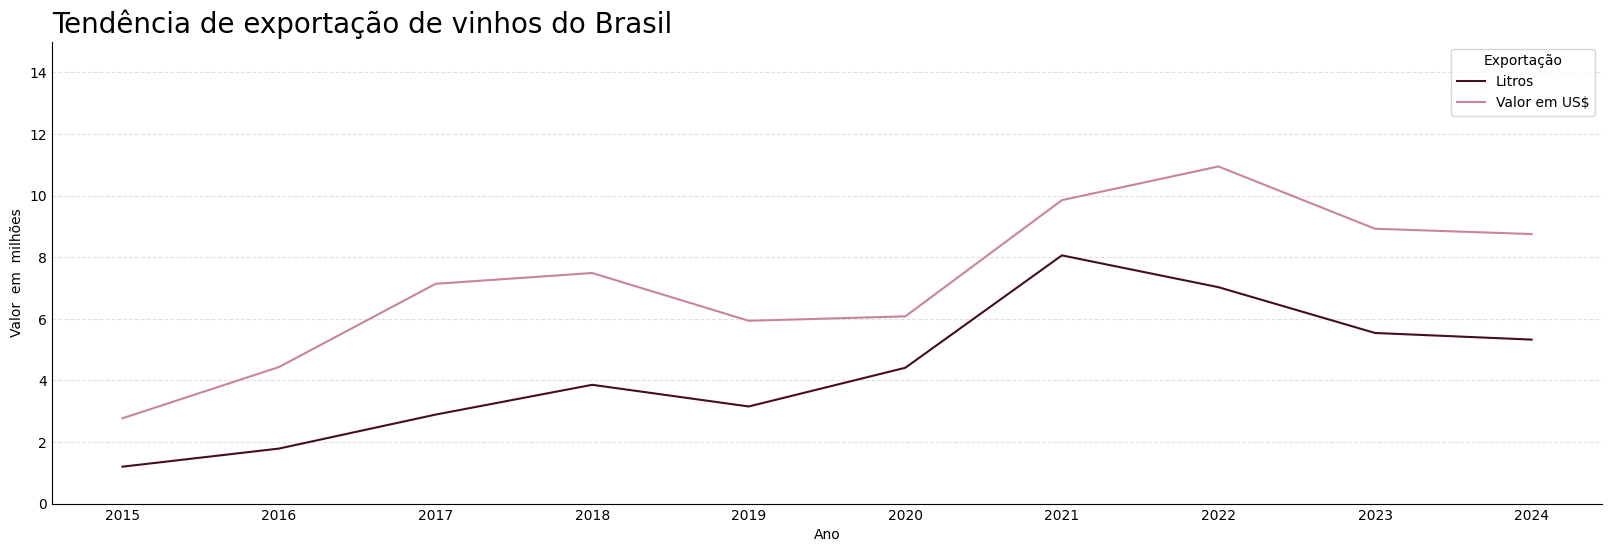

In [1579]:
#criando uma figura
fig, ax = plt.subplots(figsize=(20,6))

#definindo tipo de grafico e eixos + legenda
sns.lineplot(expo_vinhoKG_T, x = expo_vinhoKG_T.index, y = expo_vinhoKG_T['total_KG'] / 1_000_000, label= 'Litros', color = "#460C25")
sns.lineplot(expo_vinhoUS_T, x = expo_vinhoUS_T.index, y = expo_vinhoUS_T['total_US'] / 1_000_000, label= 'Valor em US$', color = "#c983a0")

#melhorando formatação do grafico
ax.set_title('Tendência de exportação de vinhos do Brasil', fontsize = 20, loc= 'left')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor  em  milhões')
ax.grid(color= '#e1e1e1', linestyle='--', axis = 'y' )
ax.legend(title = 'Exportação',loc='upper right')
ax.set_ylim(0, 15)
ax.spines['top'].set_visible(False) #retirando a linha de cima do retangulo da figura
ax.spines['right'].set_visible(False) #retirando a linha direita do retangulo da figura
ax.tick_params(axis='both', which='both', length=0) ## Removendo todos os ticks dos eixos X e Y

plt.show()


- Com base no gráfico, podemos observar que as exportações de vinho brasileiro tiveram um crescimento entre 2015 e 2018, seguidas por um período de estabilidade e uma leve queda em 2019-2020. O maior pico ocorreu em 2021, indicando um momento de forte expansão. Após esse auge, houve um declínio constante até 2024, sugerindo possível redução na demanda ou ajustes na estratégia de exportação.
- O valor das exportações se mantém mais estável nesse periodo de queda, o que sugere um aumento do preço médio por litro exportado.


#### VALOR MEDIO POR LITRO EXPORTADO

In [1580]:
# Criando um df unificado com ambos os dados (L e US)
expo_vinho_total_KG_US = pd.DataFrame({
        'Litros': expo_vinhoKG_T['total_KG'],
    'Valor em US$': expo_vinhoUS_T['total_US']
})

In [1581]:
#criando a coluna de valor por litro
expo_vinho_total_KG_US['valor_por_litro'] = expo_vinho_total_KG_US['Valor em US$'] / expo_vinho_total_KG_US['Litros']
expo_vinho_total_KG_US.head()

,Litros,Valor em US$,valor_por_litro
2015,1198479,2769160,2.31
2016,1786549,4434704,2.48
2017,2889572,7135607,2.47
2018,3856162,7486063,1.94
2019,3152873,5934826,1.88


In [1582]:
# media_por_litro = (expo_vinhoUS_T['total_US'] / expo_vinhoKG_T['total_KG']).mean()

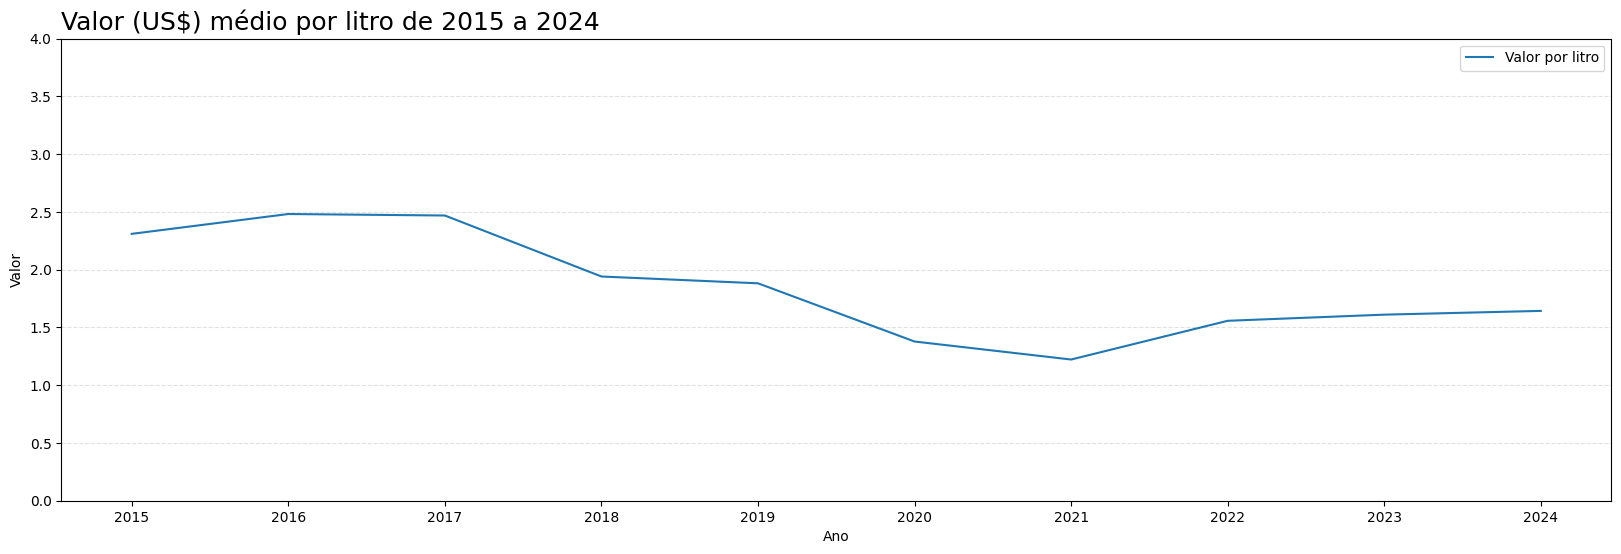

In [1583]:
#criando uma figura
ig, ax = plt.subplots(figsize=(20,6))

#definindo tipo de grafico e eixos + legenda
# sns.lineplot(expo_vinhoKG_T, x = expo_vinhoKG_T.index, y = expo_vinhoKG_T['total_KG'] / 1_000_000, label= 'Litros')
# sns.lineplot(expo_vinhoUS_T, x = expo_vinhoUS_T.index, y = expo_vinhoUS_T['total_US'] / 1_000_000, label= 'Valor em US$')
sns.lineplot(expo_vinho_total_KG_US, x = expo_vinho_total_KG_US.index, y = expo_vinho_total_KG_US['valor_por_litro'], label= 'Valor por litro')


#melhorando formatação do gráfico
ax.set_title('Valor (US$) médio por litro de 2015 a 2024', fontsize = 18, loc= 'left')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor')
ax.grid(color= '#e1e1e1', linestyle='--', axis = 'y' )
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
# ax.legend(title = 'Exportação',loc='upper right')
ax.set_ylim(0, 4)


plt.show()


#### 10 MAIORES PAISES EM EXPORTAÇÃO - VISÃO GERAL

In [1584]:
#Criando a coluna com total de exportação em litros por pais
expo_vinhoKG['Total'] = expo_vinhoKG.sum(axis=1)

#ordenando a tabela do maior para o menor total
expo_vinhoKG.sort_values('Total', ascending=False, inplace=True)

#selecionando os 10 primeiros paises em novo df
expo_vinhoKG_10 = expo_vinhoKG.head(10)

#visualizando a tabela
expo_vinhoKG_10.head(10)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
País,,,,,,,,,,,
Paraguai,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,3705268,31912196
Haiti,0,0,0,79500,81873,399128,670379,553503,559645,450690,2794718
Estados Unidos,195896,258072,132688,169109,209765,300178,111085,220373,229839,310410,2137415
Uruguai,0,0,0,7711,6180,0,136774,637117,326093,36729,1150604
China,47609,134106,67594,30835,129852,122253,61884,105395,73917,34231,807676
Reino Unido,68382,117044,60711,67708,34295,22913,25316,18835,11326,14780,441310
Japão,31597,34341,33909,36992,40621,36442,39491,37324,22942,29320,342979
Venezuela,0,0,680,71,0,4086,26415,23220,141030,122922,318424
Rússia,47664,0,0,0,0,1463,181931,66046,0,56,297160


In [1585]:
#visualizando os 10 paises com maior volume em litros
expo_vinhoKG_10.index

Index(['Paraguai', 'Haiti', 'Estados Unidos', 'Uruguai', 'China',
       'Reino Unido', 'Japão', 'Venezuela', 'Rússia', 'Curaçao'],
      dtype='object', name='País')

In [1586]:
#Pegando o valor de US dos 10 paises acima

#Criando a coluna com total de exportação em valor por pais
expo_vinhoUS['Total'] = expo_vinhoUS.sum(axis=1)

#criando um df com o US somente dos 10 paises
expo_vinhoUS_10 = expo_vinhoUS.loc[expo_vinhoKG_10.index]

#visualizando a tabela
expo_vinhoUS_10.head(10)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
País,,,,,,,,,,,
Paraguai,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263,5121857,44849363
Haiti,0,0,0,144425,129803,471152,831181,741014,871661,713158,3902394
Estados Unidos,524109,687411,1523699,512519,616274,610793,203554,447893,429091,648724,6204067
Uruguai,0,0,0,29617,18497,0,149842,997367,454271,62325,1711919
China,222866,499622,266086,126336,376828,363000,264116,404647,183096,182595,2889192
Reino Unido,308407,536681,242883,296827,164592,82722,122394,138154,84547,106713,2083920
Japão,87853,90954,92886,112342,99642,92674,90275,82208,57780,66956,873570
Venezuela,0,0,2646,355,0,9808,35944,32351,220512,199418,501034
Rússia,18240,0,0,0,0,8550,312926,118618,0,338,458672


In [1587]:
# Criando um df unificado com ambos os dados (L e US)
expo_vinho_US_KG_10 = pd.DataFrame({
    'País': expo_vinhoKG_10.index, 
    'Litros': expo_vinhoKG_10['Total'],
    'Valor em US$': expo_vinhoUS_10['Total']
})

#visualizando tabela
expo_vinho_US_KG_10.head()

,País,Litros,Valor em US$
País,,,
Paraguai,Paraguai,31912196,44849363
Haiti,Haiti,2794718,3902394
Estados Unidos,Estados Unidos,2137415,6204067
Uruguai,Uruguai,1150604,1711919
China,China,807676,2889192


In [1588]:
# convertendo as counas em linhas do df 
expo_vinho_US_KG_10_melted = expo_vinho_US_KG_10.melt(id_vars=['País'], var_name='Tipo', value_name='Total')
# id_vars=['País']: Mantém essa coluna fixa
# var_name='Tipo': Renomeia as colunas convertidas
# value_name='Total': Nomeia a coluna de valores


#visualizando tabela
expo_vinho_US_KG_10_melted.head()



,País,Tipo,Total
0,Paraguai,Litros,31912196
1,Haiti,Litros,2794718
2,Estados Unidos,Litros,2137415
3,Uruguai,Litros,1150604
4,China,Litros,807676


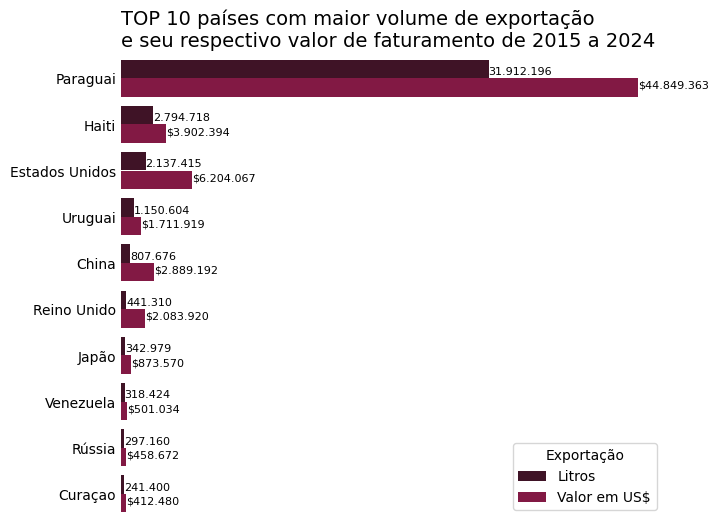

In [1589]:
#criando uma figura
fig, ax = plt.subplots(figsize=(7, 6))

#definindo tipo de grafico e eixos + legenda
sns.barplot(data=expo_vinho_US_KG_10_melted, x='Total', y='País', hue='Tipo', orient='h', ax=ax, palette=['#460C25', '#930841'])

#melhorando formatação do gráfico
ax.set_title('TOP 10 países com maior volume de exportação\ne seu respectivo valor de faturamento de 2015 a 2024', fontsize=14, loc='left')
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.legend(title="Exportação", loc="lower right")
ax.set_ylabel('')

# Exibindo valores de rotulos de dados nas barras
for i, (v_kg, v_us) in enumerate(zip(expo_vinho_US_KG_10['Litros'], expo_vinho_US_KG_10['Valor em US$'])):
    ax.text(v_kg + 20, i - 0.15, f"{v_kg:,}".replace(',', '.'), color='black', fontsize=8, ha='left', va='center')
    ax.text(v_us + 20, i + 0.15, f"${v_us:,}".replace(',', '.'), color='black', fontsize=8, ha='left', va='center')


plt.show()

- O Paraguai lidera com 31,9 milhões de litros e faturamento de $44,8 milhões, reforçando sua importância como parceiro comercial do Brasil.
- O Haiti importou 2,8 milhões de litros, mas com faturamento relativamente baixo ($3,9 milhões), indicando preferência por vinhos mais baratos.
- Os EUA, por outro lado, importaram menos volume (2,1 milhões de litros), mas gastaram mais ($6,2 milhões), possivelmente comprando vinhos de maior valor agregado.
- Países como China e Reino Unido compram volumes menores, mas apresentam alto faturamento, o que pode indicar interesse em vinhos  premium.


#### 10 MAIORES PAISES EM EXPORTAÇÃO - VISÃO TENDÊNCIA

In [1590]:
#revendo tabela KG
expo_vinhoKG.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
País,,,,,,,,,,,
Paraguai,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,3705268,31912196
Haiti,0,0,0,79500,81873,399128,670379,553503,559645,450690,2794718
Estados Unidos,195896,258072,132688,169109,209765,300178,111085,220373,229839,310410,2137415
Uruguai,0,0,0,7711,6180,0,136774,637117,326093,36729,1150604
China,47609,134106,67594,30835,129852,122253,61884,105395,73917,34231,807676


In [1591]:
#retirando a coluna total e selecionando os 10 primeiros
expo_vinhoKG_10_T = expo_vinhoKG[expo_vinhoKG.columns[:-1]].head(10)

#transpondo a tabela
expo_vinhoKG_10_T = expo_vinhoKG_10_T.T

#visualizando tabela
expo_vinhoKG_10_T.head()

País,Paraguai,Haiti,Estados Unidos,Uruguai,China,Reino Unido,Japão,Venezuela,Rússia,Curaçao
2015,495428,0,195896,0,47609,68382,31597,0,47664,0
2016,985739,0,258072,0,134106,117044,34341,0,0,0
2017,2393468,0,132688,0,67594,60711,33909,680,0,12340
2018,3234168,79500,169109,7711,30835,67708,36992,71,0,23930
2019,2419537,81873,209765,6180,129852,34295,40621,0,0,33951


In [1592]:
#retirando a coluna total e selecionando os 10 primeiros
expo_vinhoUS_10_T = expo_vinhoUS[expo_vinhoUS.columns[:-1]].head(10)

#transpondo a tabela
expo_vinhoUS_10_T = expo_vinhoUS_10_T.T

#visualizando tabela
expo_vinhoUS_10_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Austrália
2015,0,0,44780,17089,0,10545,0,0,0,48011
2016,0,0,68109,35390,0,26450,0,0,0,13799
2017,0,0,87702,61680,0,8550,0,0,0,7500
2018,0,0,45382,709,191,0,0,0,59150,6902
2019,0,95,25467,1065,1549,0,0,0,0,4682


In [1593]:
#criando figura e definindo tipo de grafico e eixos + titulo
fig = px.line(
        expo_vinhoKG_10_T,
        x= expo_vinhoKG_10_T.index,
        y= expo_vinhoKG_10_T.columns,
        title= 'Tendência de Exportação - Top 10 países'
)

#melhorando formatação do gráfico
fig.update_layout(
        xaxis_title= 'Ano', 
        yaxis_title= 'Litros Exportados',
        font_family= 'Arial', 
        font_size= 11, 
        font_color='grey', 
        title_font_color= 'black', 
        title_font_size= 18,
        plot_bgcolor="#f5f9fc"
)

#definindo minimo e max do eixo y
fig.update_yaxes(range=[0, None])


fig.show()

In [1594]:
# fig.write_html('expo_top_10.html') 
# para salvar a figura acima em html 

#### LITROS X VALOR POR PAIS

EXPORTAÇÃO PARA PARAGUAI

In [1595]:
#revisando tabela
expo_vinhoKG_T.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argélia,Argentina,Austrália,...,Togo,Toquelau,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_KG
2015,0,0,10680,1908,0,6660,0,0,0,7437,...,0,0,0,0,0,0,0,0,0,1198479
2016,0,0,14012,7359,0,16641,0,0,0,1954,...,0,0,0,0,0,0,0,0,0,1786549
2017,0,0,15467,10170,0,5400,0,0,0,1350,...,0,0,0,0,0,0,0,680,0,2889572
2018,0,0,10794,477,37,0,0,0,15711,2055,...,0,0,0,360,0,7711,0,71,0,3856162
2019,0,26,3660,345,219,0,0,0,0,1161,...,0,0,0,115,0,6180,0,0,20,3152873


In [1596]:
#criando series dos dados de paraguai (KG E US)
expo_paraguai_KG = expo_vinhoKG_T['Paraguai']
expo_paraguai_US = expo_vinhoUS_T['Paraguai']

#criando data frame com ambos
expo_paraguai = pd.DataFrame({
    'Ano': expo_paraguai_KG.index, 
    'Litros': expo_paraguai_KG,
    'Valor em US$': expo_paraguai_US
})

#selecionando a coluna ano como index
expo_paraguai.set_index('Ano', inplace=True)

#visualizando tabela
expo_paraguai.head()

,Litros,Valor em US$
Ano,,
2015,495428,741370
2016,985739,1655417
2017,2393468,4274650
2018,3234168,5494321
2019,2419537,3826587


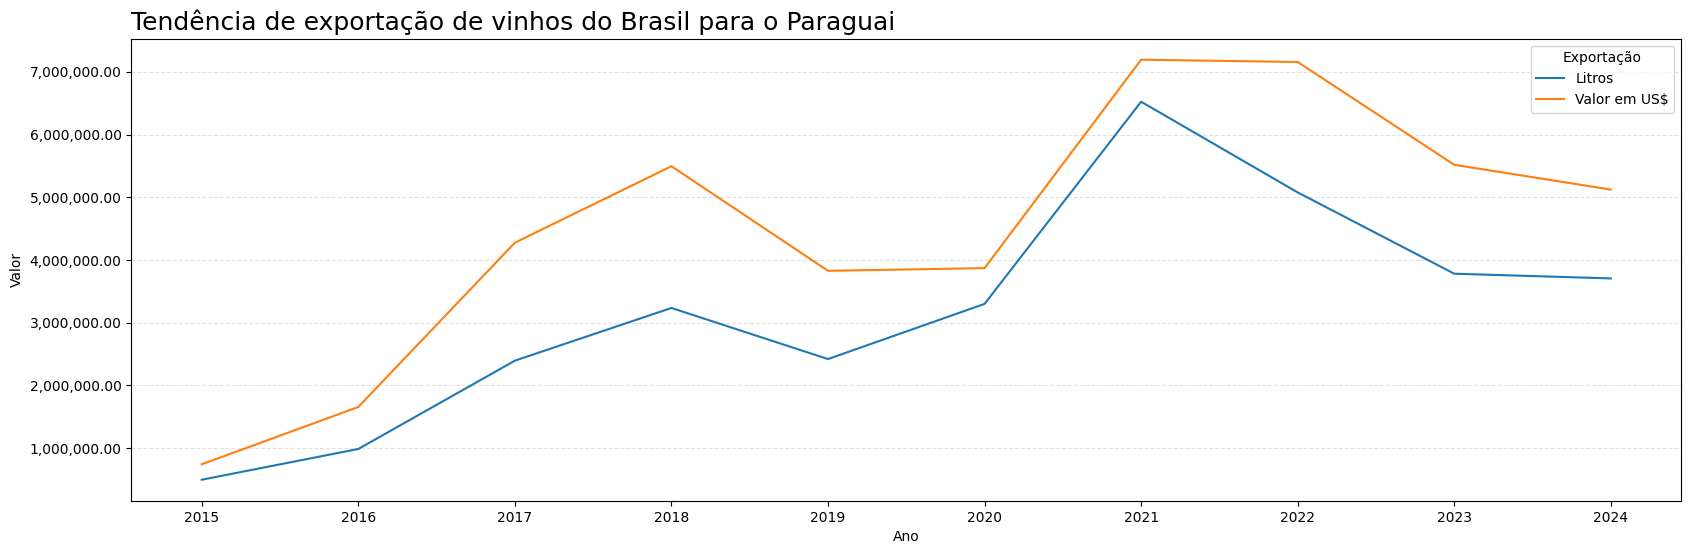

In [1597]:
#criando uma figura
fig, ax = plt.subplots(figsize=(20,6))

#definindo tipo de grafico e eixos + legenda
sns.lineplot(x=expo_paraguai.index, y=expo_paraguai['Litros'], label='Litros')
sns.lineplot(x=expo_paraguai.index, y=expo_paraguai['Valor em US$'], label='Valor em US$')


#melhorando formatação do gráfico
ax.set_title('Tendência de exportação de vinhos do Brasil para o Paraguai', fontsize = 18, loc= 'left')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor')
ax.grid(color= '#e1e1e1', linestyle='--', axis = 'y' )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(title = 'Exportação',loc='upper right')


plt.show()


EXPORTACAO HAITI

In [1598]:
#criando series dos dados de paraguai (KG E US)
expo_Haiti_KG = expo_vinhoKG_T['Haiti']
expo_Haiti_US = expo_vinhoUS_T['Haiti']

#criando data frame com ambos
expo_Haiti = pd.DataFrame({
    'Ano': expo_Haiti_KG.index, 
    'Litros': expo_Haiti_KG,
    'Valor em US$': expo_Haiti_US
})

#selecionando a coluna ano como index
expo_Haiti.set_index('Ano', inplace=True)

#visualizando tabela
expo_Haiti.head()

,Litros,Valor em US$
Ano,,
2015,0,0
2016,0,0
2017,0,0
2018,79500,144425
2019,81873,129803


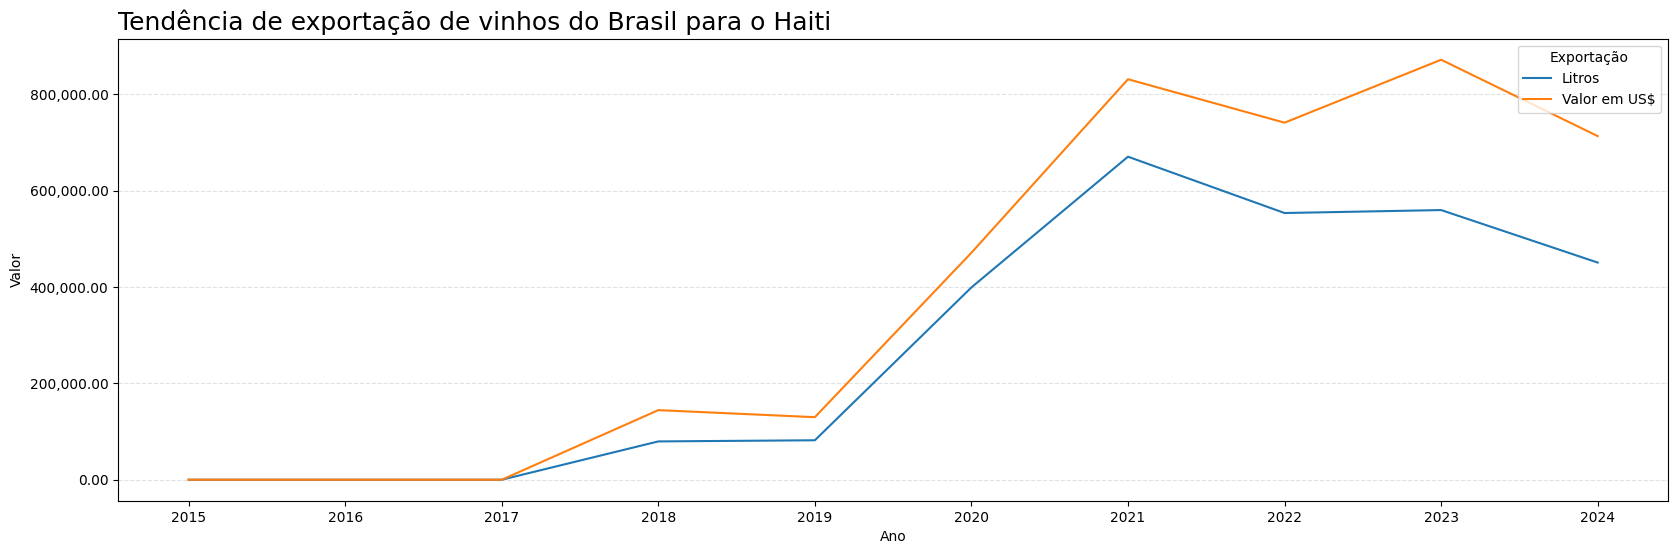

In [1599]:
#criando uma figura
fig, ax = plt.subplots(figsize=(20,6))

#definindo tipo de grafico e eixos + legenda
sns.lineplot(x=expo_Haiti.index, y=expo_Haiti['Litros'], label='Litros')
sns.lineplot(x=expo_Haiti.index, y=expo_Haiti['Valor em US$'], label='Valor em US$')

#melhorando formatação do gráfico
ax.set_title('Tendência de exportação de vinhos do Brasil para o Haiti', fontsize = 18, loc= 'left')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor')
ax.grid(color= '#e1e1e1', linestyle='--', axis = 'y' )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(title = 'Exportação',loc='upper right')


plt.show()


#### INDICE DE PARTICIPAÇÃO

In [1600]:
expo_vinhoKG.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
País,,,,,,,,,,,
Paraguai,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,3705268,31912196
Haiti,0,0,0,79500,81873,399128,670379,553503,559645,450690,2794718
Estados Unidos,195896,258072,132688,169109,209765,300178,111085,220373,229839,310410,2137415
Uruguai,0,0,0,7711,6180,0,136774,637117,326093,36729,1150604
China,47609,134106,67594,30835,129852,122253,61884,105395,73917,34231,807676


In [1601]:
expo_vinhoUS.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
País,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,46,0,0,0,46
África do Sul,0,0,0,0,95,21,0,0,698,1783,2597
"Alemanha, República Democrática",44780,68109,87702,45382,25467,32605,6741,45367,31853,48095,436101
Angola,17089,35390,61680,709,1065,0,0,4761,0,0,120694
Antígua e Barbuda,0,0,0,191,1549,1864,2268,1866,1848,3329,12915


In [1602]:
#extraindo apenas a coluna de total
expo_vinhoKG_TOTAL = expo_vinhoKG[expo_vinhoKG.columns[10:]]
expo_vinhoUS_TOTAL = expo_vinhoUS[expo_vinhoUS.columns[10:]]

In [1603]:
#renomeando as colunas de total
expo_vinhoKG_TOTAL = expo_vinhoKG_TOTAL.rename(columns= {'Total': 'Litro'})
expo_vinhoUS_TOTAL = expo_vinhoUS_TOTAL.rename(columns= {'Total': 'Valor'})

In [1604]:
#resentando o index, para usar como parametro de coluna
expo_vinhoKG_TOTAL.reset_index()
expo_vinhoUS_TOTAL.reset_index()

,País,Valor
0,Afeganistão,46
1,África do Sul,2597
2,"Alemanha, República Democrática",436101
3,Angola,120694
4,Antígua e Barbuda,12915
...,...,...
119,Tuvalu,4
120,Uruguai,1711919
121,Vanuatu,31
122,Venezuela,501034


In [1605]:
expo_vinhoKG_TOTAL.head()

,Litro
País,
Paraguai,31912196
Haiti,2794718
Estados Unidos,2137415
Uruguai,1150604
China,807676


In [1606]:
#juntando as tabelas
expo_vinho_US_KG_TOTAL = expo_vinhoKG_TOTAL.merge(
    expo_vinhoUS_TOTAL, 
    on=['País'],  # Junta pelo País
    how='outer'  # Mantém todos os países e anos, preenchendo valores ausentes
)

expo_vinho_US_KG_TOTAL.head()

,Litro,Valor
País,,
Afeganistão,11,46
"Alemanha, República Democrática",82674,436101
Angola,24327,120694
Antilhas Holandesas,28701,45545
Antígua e Barbuda,2934,12915


In [1607]:
#somando o total de litro e valor
total_litros = expo_vinho_US_KG_TOTAL['Litro'].sum()
total_valor = expo_vinho_US_KG_TOTAL['Valor'].sum()

print(f'{total_litros} LITROS E {total_valor} DOLARES')

43241392 LITROS E 72310223 DOLARES


In [1608]:
#criando as colunas de percentuais de representatividade
expo_vinho_US_KG_TOTAL['perc_litro'] = (expo_vinho_US_KG_TOTAL['Litro'] / total_litros).round(3)
expo_vinho_US_KG_TOTAL['perc_valor'] = (expo_vinho_US_KG_TOTAL['Valor'] / total_valor).round(3)

In [1609]:
#criando o peso do indice ponderado
peso_litro = 0.4
peso_valor = 0.6

#calculando o indice ponderado em nova coluna
expo_vinho_US_KG_TOTAL['indice'] = ((expo_vinho_US_KG_TOTAL['perc_litro'] * peso_litro) + (expo_vinho_US_KG_TOTAL['perc_valor'] * peso_valor)).round(3)

In [1610]:
# ordenando a coluna pelo indice 
expo_vinho_US_KG_TOTAL.sort_values('indice', ascending=False, inplace=True)
expo_vinho_US_KG_TOTAL.head()

,Litro,Valor,perc_litro,perc_valor,indice
País,,,,,
Paraguai,31912196,44849363,0.74,0.62,0.67
Estados Unidos,2137415,6204067,0.05,0.09,0.07
Haiti,2794718,3902394,0.07,0.05,0.06
China,807676,2889192,0.02,0.04,0.03
Uruguai,1150604,1711919,0.03,0.02,0.03


In [1611]:
expo_vinho_US_KG_TOTAL.head()

,Litro,Valor,perc_litro,perc_valor,indice
País,,,,,
Paraguai,31912196,44849363,0.74,0.62,0.67
Estados Unidos,2137415,6204067,0.05,0.09,0.07
Haiti,2794718,3902394,0.07,0.05,0.06
China,807676,2889192,0.02,0.04,0.03
Uruguai,1150604,1711919,0.03,0.02,0.03


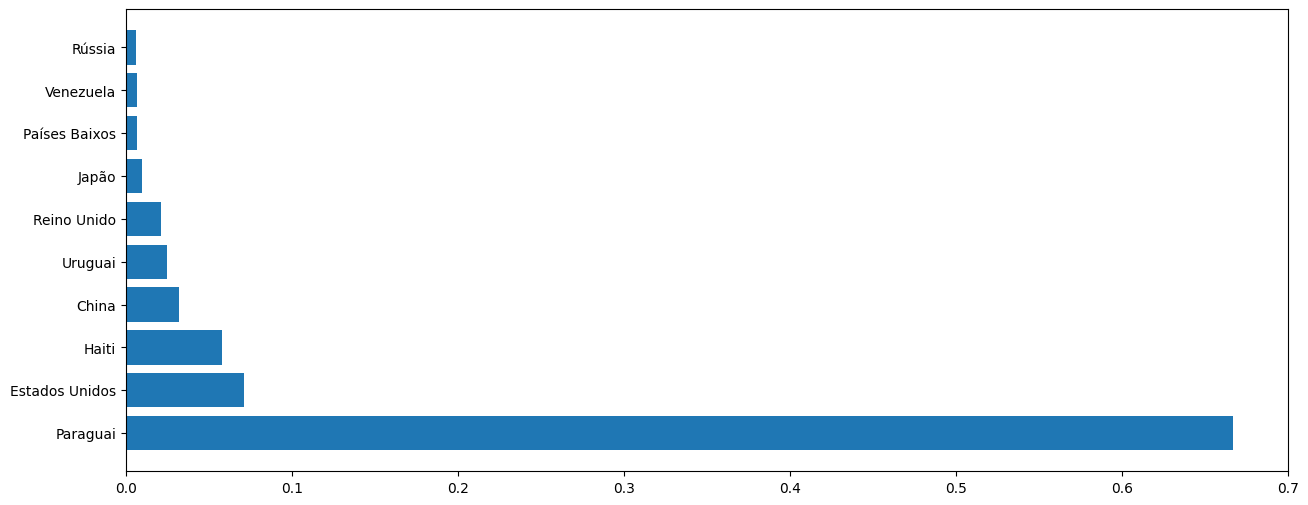

In [1612]:
#grafico top 10 paises em indice
fig = plt.subplots(figsize= (15,6))

expo_vinho_US_KG_TOTAL_10 = expo_vinho_US_KG_TOTAL.head(10)


plt.barh(expo_vinho_US_KG_TOTAL_10.index, expo_vinho_US_KG_TOTAL_10['indice'])

plt.show()

POR ANO/PAIS

In [1613]:
#removendo coluna total
expo_vinhoKG.drop('Total', axis=1, inplace=True)
expo_vinhoUS.drop('Total', axis=1, inplace=True)

In [1614]:
#resetando index
expo_vinhoKG.reset_index(inplace=True)
expo_vinhoUS.reset_index(inplace=True)

In [1615]:
expo_vinhoKG.head()

,País,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Paraguai,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,3705268
1,Haiti,0,0,0,79500,81873,399128,670379,553503,559645,450690
2,Estados Unidos,195896,258072,132688,169109,209765,300178,111085,220373,229839,310410
3,Uruguai,0,0,0,7711,6180,0,136774,637117,326093,36729
4,China,47609,134106,67594,30835,129852,122253,61884,105395,73917,34231


In [1616]:
#tranformando colunas em linhas e selecionando o index
expo_vinhoKG_melt = expo_vinhoKG.melt(id_vars=['País'], var_name='Ano', value_name='Litro')
expo_vinhoKG_melt.set_index('País')

,Ano,Litro
País,,
Paraguai,2015,495428
Haiti,2015,0
Estados Unidos,2015,195896
Uruguai,2015,0
China,2015,47609
...,...,...
Argélia,2024,6
Gabão,2024,5
Tanzânia,2024,3


In [1617]:
#tranformando colunas em linhas e selecionando o index
expo_vinhoUS_melt = expo_vinhoUS.melt(id_vars=['País'], var_name='Ano', value_name='Valor')
expo_vinhoUS_melt.set_index('País')

,Ano,Valor
País,,
Afeganistão,2015,0
África do Sul,2015,0
"Alemanha, República Democrática",2015,44780
Angola,2015,17089
Antígua e Barbuda,2015,0
...,...,...
Tuvalu,2024,0
Uruguai,2024,62325
Vanuatu,2024,0


In [1618]:
#juntando as bases
expo_vinho_US_KG_melt = expo_vinhoKG_melt.merge(
    expo_vinhoUS_melt, 
    on=['País', 'Ano'],  # Junta pelo País e Ano
    how='outer'  # Mantém todos os países e anos, preenchendo valores ausentes
)

expo_vinho_US_KG_melt.head()

,País,Ano,Litro,Valor
0,Afeganistão,2015,0,0
1,Afeganistão,2016,0,0
2,Afeganistão,2017,0,0
3,Afeganistão,2018,0,0
4,Afeganistão,2019,0,0


In [1619]:
#somando o total de litros e valor
total_litros = expo_vinho_US_KG_melt['Litro'].sum()
total_valor = expo_vinho_US_KG_melt['Valor'].sum()

print(f'{total_litros} LITROS E {total_valor} DOLARES')

43241392 LITROS E 72310223 DOLARES


In [1620]:
#formatando numeros para amotragem em apenas 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [1621]:
#criando coluna de perc
expo_vinho_US_KG_melt['perc_litro'] = (expo_vinho_US_KG_melt['Litro'] / total_litros).round(3)
expo_vinho_US_KG_melt['perc_valor'] = (expo_vinho_US_KG_melt['Valor'] / total_valor).round(3)


In [1622]:
#peso do indice
peso_litro = 0.4
peso_valor = 0.6

#calculando indice
expo_vinho_US_KG_melt['indice'] = (expo_vinho_US_KG_melt['perc_litro'] * peso_litro) + (expo_vinho_US_KG_melt['perc_valor'] * peso_valor)

In [1623]:
expo_vinho_US_KG_melt.head()

,País,Ano,Litro,Valor,perc_litro,perc_valor,indice
0,Afeganistão,2015,0,0,0.00,0.00,0.00
1,Afeganistão,2016,0,0,0.00,0.00,0.00
2,Afeganistão,2017,0,0,0.00,0.00,0.00
3,Afeganistão,2018,0,0,0.00,0.00,0.00
4,Afeganistão,2019,0,0,0.00,0.00,0.00


#### VALOR MÉDIO POR LITRO POR PAÍS

In [1624]:
expo_vinhoKG_TOTAL.head()

,Litro
País,
Paraguai,31912196
Haiti,2794718
Estados Unidos,2137415
Uruguai,1150604
China,807676


In [1625]:
#resetando o index
expo_vinhoKG_TOTAL.reset_index()
expo_vinhoUS_TOTAL.reset_index()

,País,Valor
0,Afeganistão,46
1,África do Sul,2597
2,"Alemanha, República Democrática",436101
3,Angola,120694
4,Antígua e Barbuda,12915
...,...,...
119,Tuvalu,4
120,Uruguai,1711919
121,Vanuatu,31
122,Venezuela,501034


In [1626]:
#juntando os df
expo_vinho_US_KG_Mesia_Valor = expo_vinhoKG_TOTAL.merge(
    expo_vinhoUS_TOTAL, 
    on=['País'],  # Junta pelo País
    how='outer'  # Mantém todos os países e anos, preenchendo valores ausentes
)

expo_vinho_US_KG_Mesia_Valor.head()

,Litro,Valor
País,,
Afeganistão,11,46
"Alemanha, República Democrática",82674,436101
Angola,24327,120694
Antilhas Holandesas,28701,45545
Antígua e Barbuda,2934,12915


In [1627]:
#criando coluna de valor por litro
expo_vinho_US_KG_Mesia_Valor['US_por_litro'] = (expo_vinho_US_KG_Mesia_Valor['Valor'] / expo_vinho_US_KG_Mesia_Valor['Litro']).round(2)
expo_vinho_US_KG_Mesia_Valor.head()

,Litro,Valor,US_por_litro
País,,,
Afeganistão,11,46,4.18
"Alemanha, República Democrática",82674,436101,5.27
Angola,24327,120694,4.96
Antilhas Holandesas,28701,45545,1.59
Antígua e Barbuda,2934,12915,4.40


In [1628]:
#ordenando pelo valor por litro
expo_vinho_US_KG_Mesia_Valor.sort_values('US_por_litro', ascending=False)

,Litro,Valor,US_por_litro
País,,,
Argélia,6,87,14.50
Bulgária,140,1794,12.81
Tanzânia,3,35,11.67
Bangladesh,12,133,11.08
Emirados Arabes Unidos,12112,127047,10.49
...,...,...,...
Cuba,229289,256513,1.12
São Tomé e Príncipe,2184,2357,1.08
Macau,7,6,0.86


In [1629]:
#selecionando só os 4 maiores paises em participação
expo_vinho_US_KG_Mesia_Valor.loc[['Paraguai', 'Estados Unidos', 'Haiti', 'China']]

,Litro,Valor,US_por_litro
País,,,
Paraguai,31912196,44849363,1.41
Estados Unidos,2137415,6204067,2.90
Haiti,2794718,3902394,1.40
China,807676,2889192,3.58
